<a href="https://colab.research.google.com/github/anandkiit/Diabetes-prediction-model/blob/main/proj_Dog_vs_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Dataset using kaggle library

In [6]:
# installing the kaggle library
!pip install kaggle

In [7]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


Importing the dog vs cat dataset from kaggle

In [8]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 807M/812M [00:08<00:00, 103MB/s]
100% 812M/812M [00:08<00:00, 104MB/s]


In [9]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [10]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset has been extracted.')


The dataset has been extracted.


In [11]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset has been extracted.')


The dataset has been extracted.


In [12]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('NUmber of images:', file_count)

NUmber of images: 25000


Printing the name of images

In [13]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.4168.jpg', 'dog.11021.jpg', 'cat.7723.jpg', 'cat.5755.jpg', 'cat.542.jpg', 'dog.7950.jpg', 'dog.9292.jpg', 'dog.9030.jpg', 'cat.6508.jpg', 'dog.11198.jpg', 'dog.3274.jpg', 'cat.1685.jpg', 'dog.2202.jpg', 'dog.10866.jpg', 'cat.5109.jpg', 'cat.10100.jpg', 'cat.2166.jpg', 'cat.9730.jpg', 'cat.12247.jpg', 'dog.6873.jpg', 'dog.7292.jpg', 'cat.5753.jpg', 'dog.10543.jpg', 'dog.5200.jpg', 'dog.3399.jpg', 'dog.3711.jpg', 'cat.7123.jpg', 'cat.2593.jpg', 'cat.2327.jpg', 'dog.1017.jpg', 'dog.3919.jpg', 'dog.10907.jpg', 'cat.6419.jpg', 'cat.8291.jpg', 'dog.8410.jpg', 'cat.6509.jpg', 'cat.6720.jpg', 'cat.11784.jpg', 'dog.1290.jpg', 'dog.924.jpg', 'cat.6126.jpg', 'dog.10391.jpg', 'dog.7707.jpg', 'dog.5518.jpg', 'cat.8786.jpg', 'dog.11469.jpg', 'dog.6734.jpg', 'dog.49.jpg', 'cat.502.jpg', 'dog.8203.jpg', 'cat.8491.jpg', 'dog.9132.jpg', 'cat.8255.jpg', 'dog.3432.jpg', 'dog.3508.jpg', 'dog.4212.jpg', 'dog.9604.jpg', 'cat.6037.jpg', 'dog.4389.jpg', 'dog.9356.jpg', 'cat.3856.jpg', 'dog.517.jpg', 'do

Importing the dependencies

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


Displaying the images of dogs and cats

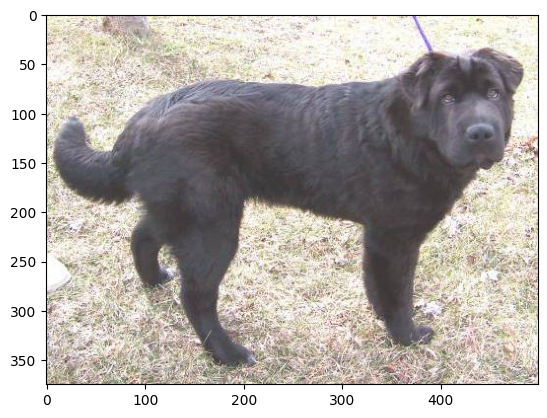

In [15]:
# display dog image
img = mpimg.imread('/content/train/dog.11021.jpg')
imgplot = plt.imshow(img)
plt.show()


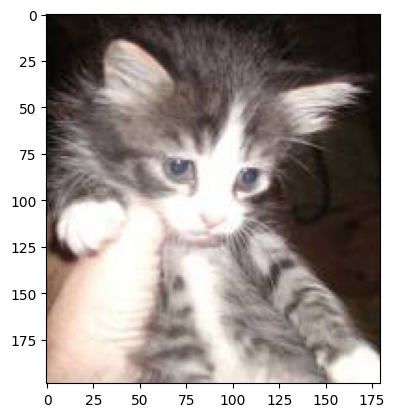

In [16]:
# display cat image
img = mpimg.imread('/content/train/cat.7723.jpg')
imgplot = plt.imshow(img)
plt.show()


In [17]:
file_names = os.listdir('/content/train')

for i in range(5):
  name=file_names[i]
  print(name[0:3])


dog
dog
cat
cat
cat


In [18]:
file_names = os.listdir('/content/train')
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count +=1
  else:
    cat_count +=1
print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)


Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [19]:
# creating a directory for resized images
os.mkdir('/content/image resized')

In [20]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open( img_path )
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)


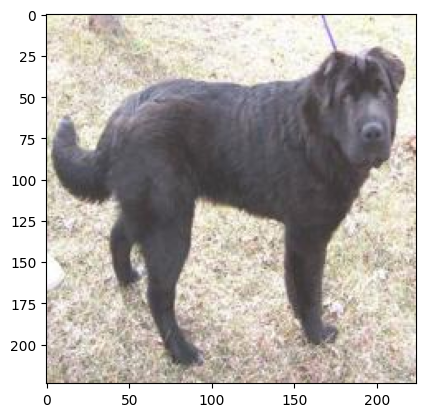

In [21]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.11021.jpg')
imgplot = plt.imshow(img)
plt.show()


creating labels for resized imiages for dogs and cats

cat--> 0

DOg --> 1

In [22]:
# creating a for loop for assign labels

file_names = os.listdir('/content/image resized/')

labels = []

for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)


In [23]:
print(file_names[0:5])
print(len(file_names))

['dog.4168.jpg', 'dog.11021.jpg', 'cat.7723.jpg', 'cat.5755.jpg', 'cat.542.jpg']
2000


In [24]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 0, 0]
2000


In [25]:
# counting the images of cat and dogs out of 2000 images

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1007  993]


converting all the resized images to numpy arrays

In [26]:
import cv2
import glob

In [27]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory +'*.' + e))for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [28]:
print(dog_cat_images)

[[[[171 197 214]
   [171 197 214]
   [171 197 214]
   ...
   [ 86 190 225]
   [ 49 132 170]
   [  0  53  91]]

  [[171 197 214]
   [171 197 214]
   [171 197 214]
   ...
   [ 84 190 227]
   [ 53 138 176]
   [  0  65 102]]

  [[171 197 214]
   [171 197 214]
   [171 197 214]
   ...
   [ 82 192 228]
   [ 57 148 185]
   [  1  84 122]]

  ...

  [[125 151 168]
   [124 150 167]
   [124 150 167]
   ...
   [113 124 132]
   [114 126 136]
   [115 130 139]]

  [[125 149 167]
   [125 149 167]
   [125 149 167]
   ...
   [113 124 132]
   [111 123 133]
   [115 129 141]]

  [[125 149 167]
   [125 149 167]
   [125 149 167]
   ...
   [114 125 133]
   [111 123 135]
   [118 132 144]]]


 [[[218 245 242]
   [223 250 247]
   [227 251 251]
   ...
   [206 227 229]
   [208 229 231]
   [212 235 237]]

  [[221 248 245]
   [217 244 241]
   [215 239 239]
   ...
   [211 230 233]
   [215 236 238]
   [219 242 244]]

  [[209 237 237]
   [206 234 234]
   [207 233 233]
   ...
   [217 237 238]
   [221 242 243]
   [226 247

In [29]:
type(dog_cat_images)

numpy.ndarray

In [30]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [31]:
x = dog_cat_images
y = np.asarray(labels)

Train Train split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [33]:
print(x.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [34]:
# scaling the data
x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [35]:
print(x_train_scaled)

[[[[0.03921569 0.21176471 0.33333333]
   [0.04705882 0.24313725 0.36078431]
   [0.04705882 0.30196078 0.41176471]
   ...
   [0.11372549 0.25490196 0.3254902 ]
   [0.17647059 0.30980392 0.37254902]
   [0.17254902 0.30588235 0.36862745]]

  [[0.03137255 0.20392157 0.3254902 ]
   [0.03921569 0.23529412 0.35294118]
   [0.03529412 0.29019608 0.4       ]
   ...
   [0.13333333 0.2745098  0.34509804]
   [0.19607843 0.32941176 0.39215686]
   [0.19607843 0.32941176 0.39215686]]

  [[0.03529412 0.20784314 0.32941176]
   [0.03529412 0.23137255 0.34901961]
   [0.03529412 0.29019608 0.4       ]
   ...
   [0.14117647 0.28235294 0.35294118]
   [0.21176471 0.34509804 0.40784314]
   [0.20784314 0.34117647 0.40392157]]

  ...

  [[0.05098039 0.12941176 0.10980392]
   [0.00784314 0.08627451 0.06666667]
   [0.         0.0745098  0.05490196]
   ...
   [0.28235294 0.39215686 0.43529412]
   [0.29411765 0.40392157 0.44705882]
   [0.30588235 0.41568627 0.45882353]]

  [[0.         0.04705882 0.02745098]
   [0.0

Building a neural network

In [52]:
mobilenet_model = 'https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow1/035-160-classification/1?tfhub-redirect=true'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [58]:
import tensorflow as tf
import tensorflow_hub as hub

class HubLayerWrapper(tf.keras.layers.Layer):
    def __init__(self, hub_url, trainable=False):
        super().__init__()
        self.hub_layer = hub.KerasLayer(hub_url, trainable=trainable)

    def call(self, inputs):
        return self.hub_layer(inputs)

# Number of output classes
num_of_classes = 2

# Wrap the pretrained model
pretrained_model = HubLayerWrapper(
    "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5",
    trainable=False
)

# Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),  # Define input shape
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hub_layer_wrapper (HubLayerWrapper)  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,098 (16.01 KB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [61]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 296s 6s/step - acc: 0.8583 - loss: 0.3797
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 328s 6s/step - acc: 0.9811 - loss: 0.0667
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 308s 6s/step - acc: 0.9881 - loss: 0.0356
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 338s 6s/step - acc: 0.9917 - loss: 0.0270
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 312s 6s/step - acc: 0.9971 - loss: 0.0216


In [62]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 ━━━━━━━━━━━━━━━━━━━━ 88s 6s/step - acc: 0.9846 - loss: 0.0490
Test Loss = 0.06590777635574341
Test Accuracy = 0.9775000214576721


Predictive system

Path of the image to be predicted: /content/cat1.jpeg


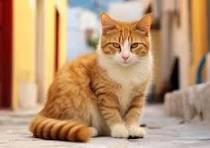

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
[[9.9999511e-01 4.8418688e-06]]
0
The image represents a Cat


In [64]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')